# TASK #1: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
!pip install cufflinks
!pip install jupyterthemes


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf 
cf.go_offline() 
init_notebook_mode(connected=True)
from jupyterthemes import jtplot 
jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

In [3]:
 telecom_df = pd.read_csv("C:/Users/saira/Downloads/telecom_churn.csv")

In [4]:
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [6]:
telecom_df.shape

(5000, 21)

In [7]:
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [8]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

# TASK #2: PERFORM DATA VISUALIZATION

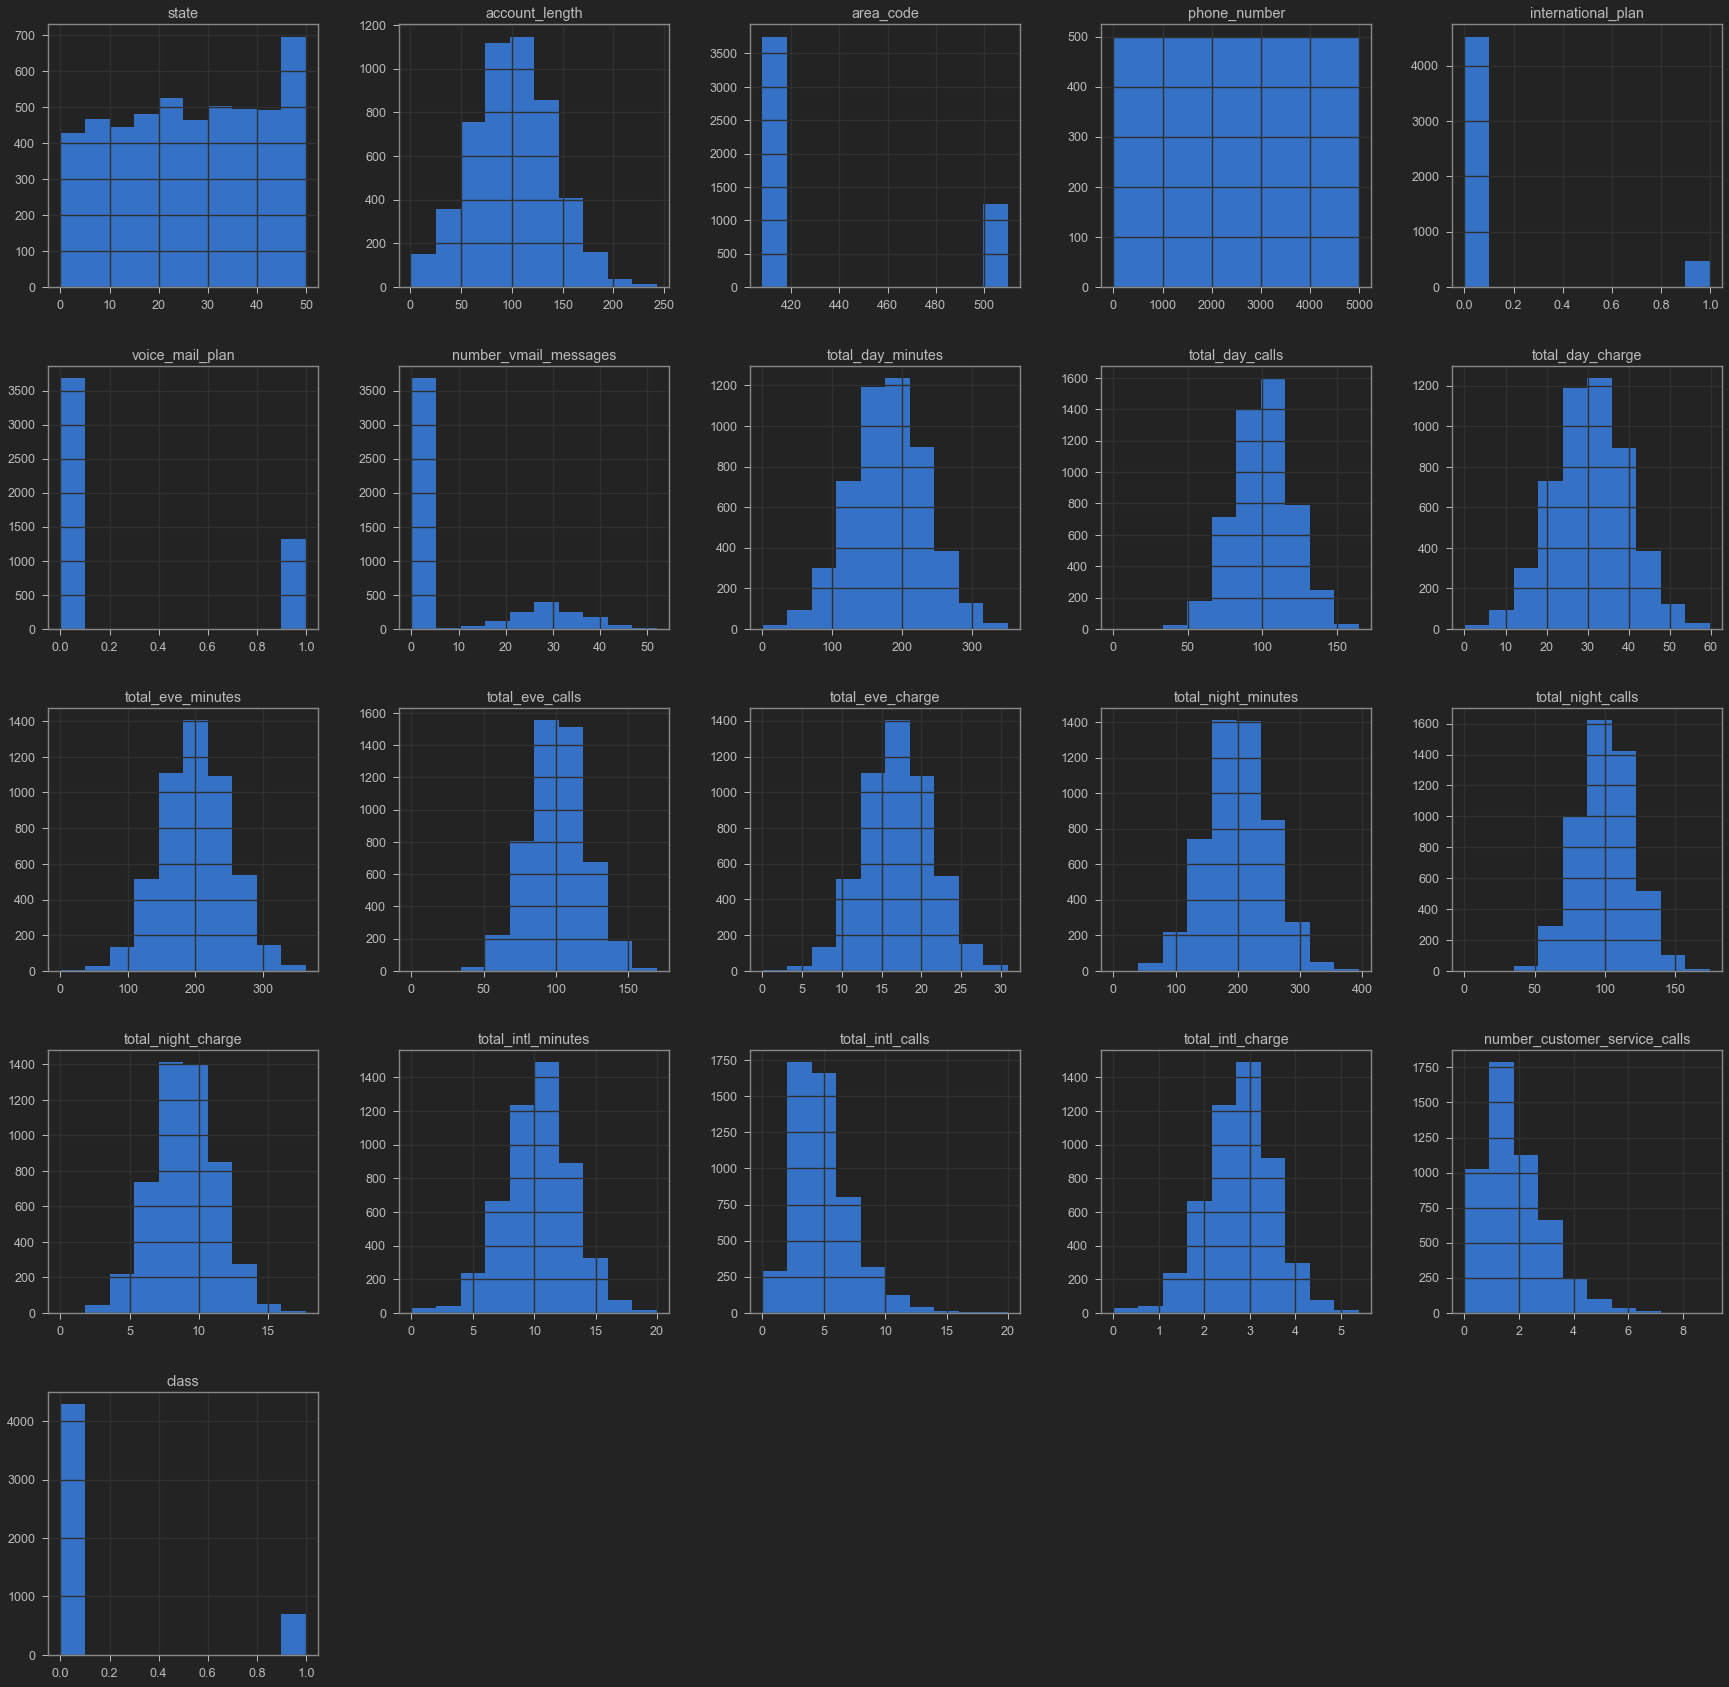

In [9]:
telecom_df.hist(figsize = (30, 30))
plt.show()

In [10]:
telecom_df["class"].value_counts()


0    4293
1     707
Name: class, dtype: int64

In [11]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Pie(labels = ["Exited (1)", "Retained (0)"], values = telecom_df["class"].value_counts())])
fig.show()

In [12]:
fig = px.histogram(telecom_df, x = "international_plan",
                  color = "class",
                  title = "International Plan service opted by the Telecom Customers")
fig.show()

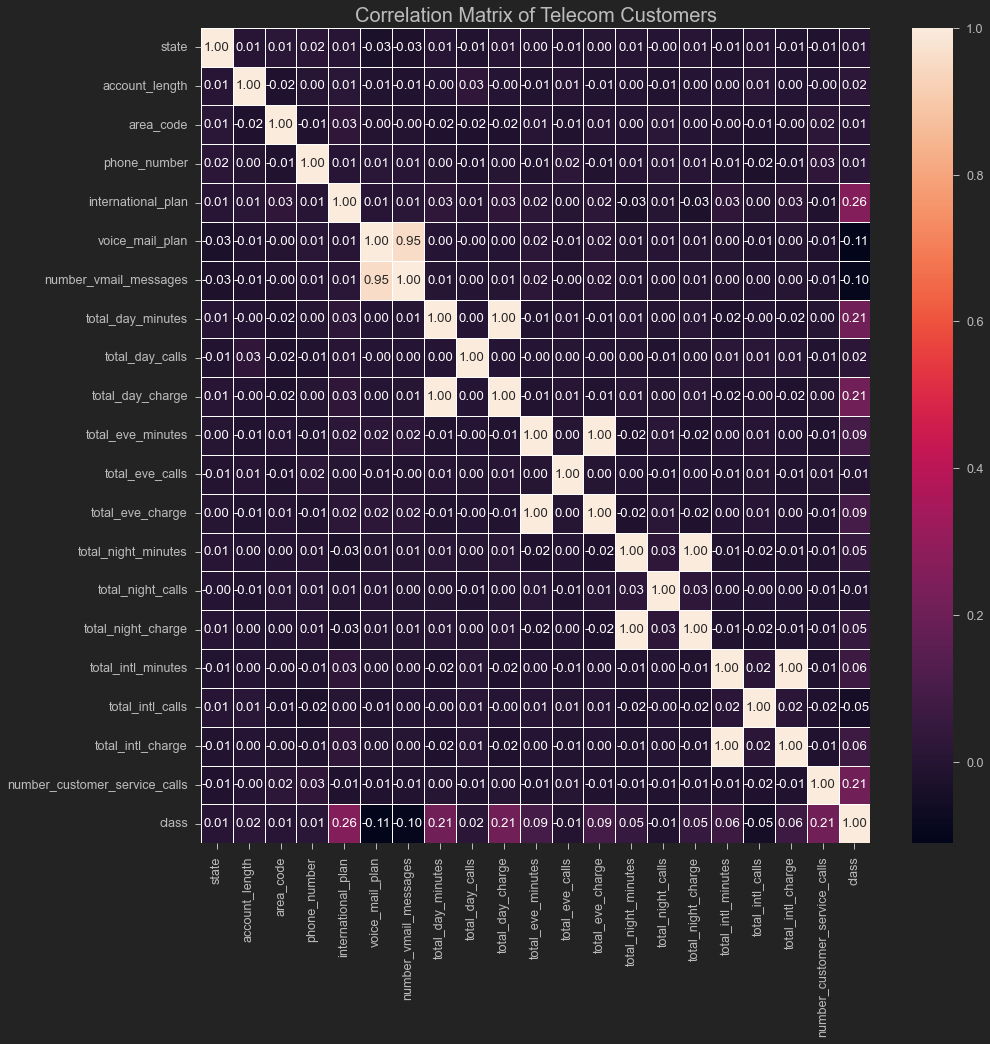

In [13]:
# Correlation Matrix

corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True, 
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()


Text(0.5, 1.0, 'Distribution of day charges by churn')

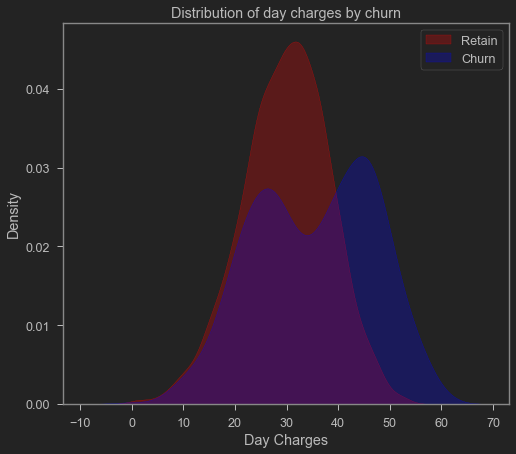

In [14]:
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

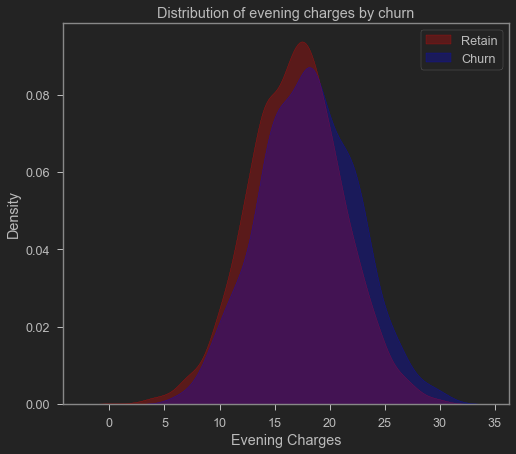

In [15]:
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

# TASK #3: IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING 

In [16]:
X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [17]:
X.shape

(5000, 18)

In [18]:
y.shape

(5000,)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

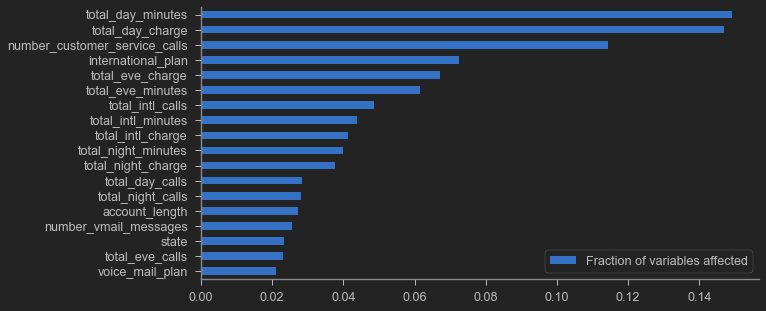

In [21]:
feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [22]:
# The above graph is generated by Random Forest algorithm 
# The graph indicates that "total_day_minutes" tops the list of important features followed by "total_day_minutes" and so on.

# TASK #3: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
        
model_LR.fit(X_train, y_train)

C:\Users\saira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [24]:
y_predict = model_LR.predict(X_test)

In [25]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1299
           1       0.42      0.09      0.15       201

    accuracy                           0.86      1500
   macro avg       0.65      0.54      0.54      1500
weighted avg       0.81      0.86      0.82      1500



# TASK #4: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [26]:
from sklearn.calibration import CalibratedClassifierCV 
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc) 
model_svm.fit(X_train, y_train)

C:\Users\saira\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\saira\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\saira\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\saira\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\saira\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=100000))

In [27]:
y_predict = model_svm.predict(X_test)

In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1299
           1       0.51      0.15      0.23       201

    accuracy                           0.87      1500
   macro avg       0.69      0.56      0.58      1500
weighted avg       0.83      0.87      0.83      1500



<AxesSubplot:>

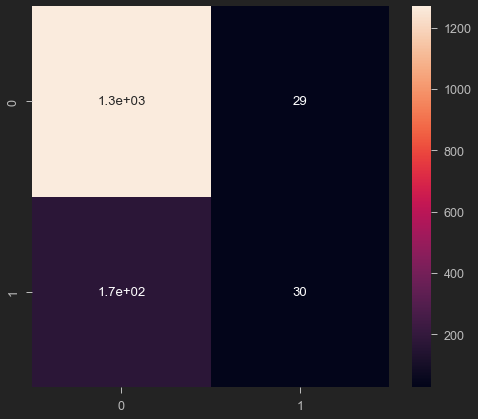

In [29]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TASK #5: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_predict = model_rf.predict(X_test)

In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.94      0.76      0.84       201

    accuracy                           0.96      1500
   macro avg       0.95      0.88      0.91      1500
weighted avg       0.96      0.96      0.96      1500



<AxesSubplot:>

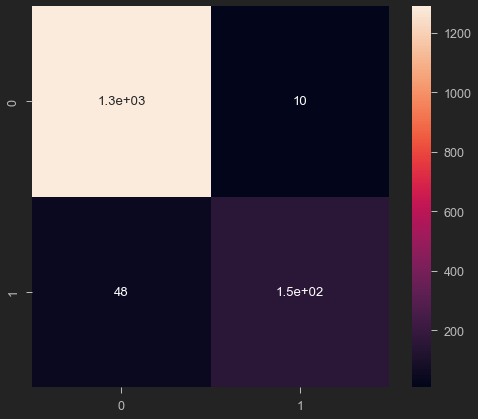

In [33]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TASK #6: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_predict = model_knn.predict(X_test) 

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1299
           1       0.67      0.25      0.37       201

    accuracy                           0.88      1500
   macro avg       0.78      0.62      0.65      1500
weighted avg       0.86      0.88      0.86      1500



<AxesSubplot:>

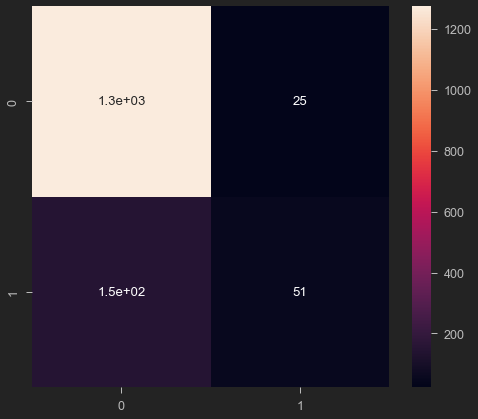

In [37]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

MINI CHALLENGE #6:

Which of the following answers represents the Euclidean distance between the two points A(1, 3) and B(2, 3)?

1. 2
2. 4
3. 1
4. 8

# TASK #7: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [40]:
y_predict = model_gnb.predict(X_test)

In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1299
           1       0.53      0.52      0.52       201

    accuracy                           0.87      1500
   macro avg       0.73      0.72      0.72      1500
weighted avg       0.87      0.87      0.87      1500



<AxesSubplot:>

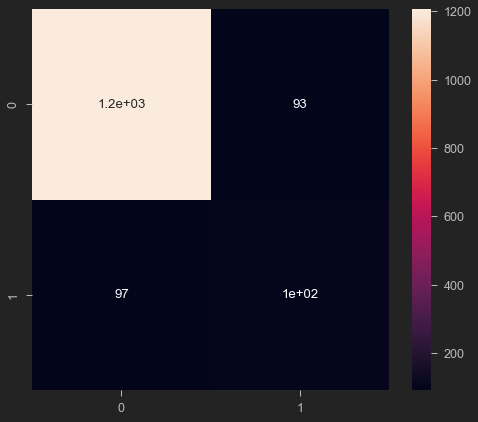

In [42]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TASK #8: PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

In [43]:
model_LR.predict_proba(X_test)

array([[0.97161618, 0.02838382],
       [0.92462683, 0.07537317],
       [0.9002019 , 0.0997981 ],
       ...,
       [0.91535144, 0.08464856],
       [0.95097445, 0.04902555],
       [0.97582178, 0.02417822]])

In [44]:
model_LR.predict_proba(X_test)[:, 1]

array([0.02838382, 0.07537317, 0.0997981 , ..., 0.08464856, 0.04902555,
       0.02417822])

In [45]:
y_test

4827    0
1793    0
2957    0
4218    0
2188    0
       ..
4230    1
3824    0
262     0
1100    0
4359    0
Name: class, Length: 1500, dtype: int64

In [46]:
from sklearn.metrics import roc_curve


In [47]:
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [48]:
fpr1

array([0.00000000e+00, 7.69822941e-04, 7.69822941e-04, 1.53964588e-03,
       1.53964588e-03, 3.07929176e-03, 3.07929176e-03, 3.84911470e-03,
       3.84911470e-03, 4.61893764e-03, 4.61893764e-03, 9.23787529e-03,
       9.23787529e-03, 1.00076982e-02, 1.00076982e-02, 1.23171671e-02,
       1.23171671e-02, 1.38568129e-02, 1.38568129e-02, 1.53964588e-02,
       1.53964588e-02, 1.69361047e-02, 1.69361047e-02, 1.77059276e-02,
       1.77059276e-02, 1.84757506e-02, 1.84757506e-02, 2.00153965e-02,
       2.00153965e-02, 2.30946882e-02, 2.30946882e-02, 2.54041570e-02,
       2.54041570e-02, 2.61739800e-02, 2.61739800e-02, 3.61816782e-02,
       3.61816782e-02, 3.77213241e-02, 3.77213241e-02, 4.00307929e-02,
       4.00307929e-02, 4.15704388e-02, 4.15704388e-02, 4.23402617e-02,
       4.23402617e-02, 4.38799076e-02, 4.38799076e-02, 4.84988453e-02,
       4.84988453e-02, 4.92686682e-02, 4.92686682e-02, 5.46574288e-02,
       5.46574288e-02, 5.61970747e-02, 5.61970747e-02, 5.85065435e-02,
      

In [49]:
tpr1

array([0.        , 0.        , 0.00497512, 0.00497512, 0.00995025,
       0.00995025, 0.01492537, 0.01492537, 0.0199005 , 0.0199005 ,
       0.02487562, 0.02487562, 0.03482587, 0.03482587, 0.039801  ,
       0.039801  , 0.04477612, 0.04477612, 0.04975124, 0.04975124,
       0.05970149, 0.05970149, 0.06467662, 0.06467662, 0.07462687,
       0.07462687, 0.08955224, 0.08955224, 0.09950249, 0.09950249,
       0.10447761, 0.10447761, 0.11940299, 0.11940299, 0.12437811,
       0.12437811, 0.13432836, 0.13432836, 0.13930348, 0.13930348,
       0.15920398, 0.15920398, 0.1641791 , 0.1641791 , 0.16915423,
       0.16915423, 0.1840796 , 0.1840796 , 0.18905473, 0.18905473,
       0.19900498, 0.19900498, 0.2039801 , 0.2039801 , 0.20895522,
       0.20895522, 0.21890547, 0.21890547, 0.2238806 , 0.2238806 ,
       0.22885572, 0.22885572, 0.23383085, 0.23383085, 0.23880597,
       0.23880597, 0.24378109, 0.24378109, 0.24875622, 0.24875622,
       0.25373134, 0.25373134, 0.26368159, 0.26368159, 0.26865

In [50]:
thresh1

array([1.8509052 , 0.8509052 , 0.81262809, 0.7771443 , 0.75515218,
       0.73583084, 0.73070996, 0.71501738, 0.71417608, 0.71108089,
       0.68946953, 0.64330875, 0.63895841, 0.63682321, 0.63586507,
       0.58874596, 0.57838843, 0.55805371, 0.54140661, 0.5370727 ,
       0.52572986, 0.52204934, 0.52197133, 0.51960409, 0.51664895,
       0.5163042 , 0.50483015, 0.49940193, 0.49338979, 0.47557557,
       0.47389358, 0.46829653, 0.46112749, 0.45972278, 0.45895876,
       0.42249488, 0.41868739, 0.41653174, 0.41210253, 0.40653647,
       0.40314983, 0.40202376, 0.401257  , 0.40018031, 0.39799311,
       0.39669554, 0.39474429, 0.39078905, 0.38449192, 0.38270285,
       0.37999722, 0.36706531, 0.36566962, 0.3642241 , 0.36401303,
       0.36248577, 0.35796844, 0.35554631, 0.35459933, 0.35362617,
       0.35361415, 0.35035459, 0.35018467, 0.34547687, 0.34539617,
       0.34531901, 0.34388759, 0.34347744, 0.34097302, 0.33530599,
       0.33461207, 0.33169804, 0.33080829, 0.32593745, 0.32584

In [51]:
# ROC curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [52]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.697509373839042
Support Vector Machine:  0.8066327331778367
Random Forest:  0.9061428806697843
K-Nearest Neighbors:  0.6563123566156898
Naive Bayes:  0.8270158062650564


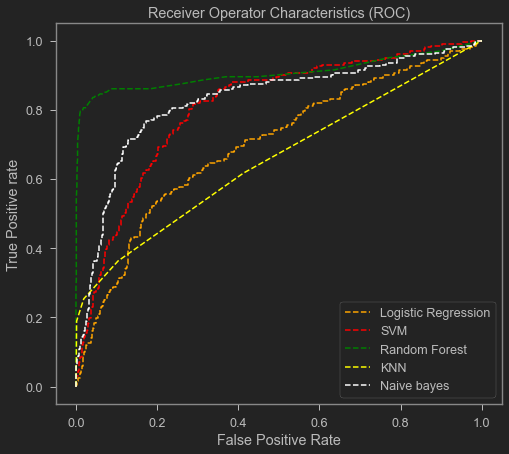

In [53]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

# TASK #9: CONCLUSION

In [54]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.94      0.76      0.84       201

    accuracy                           0.96      1500
   macro avg       0.95      0.88      0.91      1500
weighted avg       0.96      0.96      0.96      1500



<AxesSubplot:>

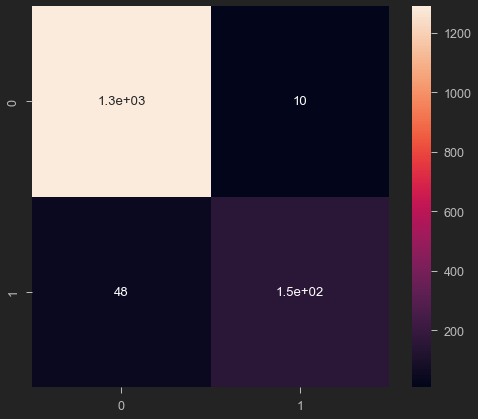

In [55]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

sqrt((1-2)^2 + (3-3)^2)= 1